In [1]:
import os
import numpy as np
import pandas as pd
import csv

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

import seaborn as sns
sns.set(context="paper", font_scale=1.5, rc={"lines.linewidth": 2}, font='DejaVu Serif')
#import bottleneck as bn

In [2]:
def loadFilesNamePath(directorRoot: str):
    l_files_name_path = []
    for path, subdirs, files in os.walk(directorRoot):
        for name in files:
            l_files_name_path.append(os.path.join(path, name))
    return l_files_name_path

In [3]:
def loadFile(file_name):
    with open(file_name, 'r') as f:
        file_data = f.read()
        f.close()
    return file_data.splitlines()

In [4]:
"""
========
Function Generating Barchart
========

A bar plot with errorbars and height labels on individual bars
"""
def barCharGenerator(groupListData: list, ListLabel: list, groupListLegend: list
                     , ylabel: str, xlabel: str, title: str, figSize=(15, 9)):
    N = 4
    ind = np.arange(N)  # the x locations for the groups
    width = 0.12       # the width of the bars
    std_CoFactor = [0.01, 0.01, 0.01, 0.01]
    std_1 = [0.02, 0.02, 0.02, 0.02]
    std_2 = [0.01, 0.01, 0.01, 0.01]
    std_3 = [0.02, 0.02, 0.02, 0.02]
    std_4 = [0.01, 0.01, 0.01, 0.01]
    std_5 = [0.01, 0.01, 0.01, 0.01]
    
    #Zerando os pausinhos em cima das barras
    std_CoFactor = std_1 = std_2 = std_3 = std_4 = std_5 = [0,0,0,0]
    
    CoFactor = groupListData[0]
    Other_1 = groupListData[1]
    Other_2 = groupListData[2]
    Other_3 = groupListData[3]
    Other_4 = groupListData[4]
    Other_5 = groupListData[5]

    #Define Plot
    fig, ax = plt.subplots(figsize=figSize)

    rects1 = ax.bar(ind, CoFactor, width, color='yellow', yerr=std_CoFactor)
    rects2 = ax.bar(ind + width, Other_1, width, color='olive', yerr=std_1)
    rects3 = ax.bar(ind + width*2, Other_2, width, color='darkkhaki', yerr=std_2)
    rects4 = ax.bar(ind + width*3, Other_3, width, color='darkseagreen', yerr=std_3)
    rects5 = ax.bar(ind + width*4, Other_4, width, color='lightgreen', yerr=std_4)
    rects6 = ax.bar(ind + width*5, Other_5, width, color='darkolivegreen', yerr=std_5)

    # add some text for labels, title and axes ticks
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.set_title(title)
    ax.set_xticks(ind + (width*5) / 2)
    ax.set_xticklabels(ListLabel)

    ax.legend( (rects1[0], rects2[0], rects3[0], rects4[0], rects5[0], rects6[0]) , groupListLegend)
    
    start, end = ax.get_ylim()
    ax.yaxis.set_ticks(np.arange(start, end, 0.01))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%2.2f'))

    def autolabel(rects, mult_height):
        """
        Attach a text label above each bar displaying its height
        """
        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()/2., mult_height*height,
                    '%2.4f' % float(height),
                    ha='center', va='bottom')

    '''autolabel(rects1, 1.05)
    autolabel(rects2, 1.13)
    autolabel(rects3, 1.05)
    autolabel(rects4, 1.13)
    autolabel(rects5, 1.05)
    autolabel(rects6, 1.13)'''

    plt.show()

In [5]:
def prepraraFiles(list_file_name: list, file_path: str):    
    CoFactor_dic = {'Recall@10':0.1640,'Recall@20':0.1611, 'Recall@50':0.1842, 'Recall@100': 0.2381
                            , 'NDCG@10': 0.1675, 'NDCG@20': 0.1601, 'NDCG@50': 0.1615, 'NDCG@100': 0.1803
                            , 'MAP@10': 0.0965, 'MAP@20': 0.0780, 'MAP@50': 0.0625, 'MAP@100': 0.0593}
    file_dic = {}

    for f_name in list_file_name:
        file_name = f_name.split('_')
        key_name = str.capitalize(file_name[0])+'_'+str.capitalize(file_name[1])+'_'+file_name[2]+'%'
        list_file_content = loadFile(file_path+f_name)
        list_file_content = list(filter(None, list_file_content))
        data_dic = {}

        for line in list_file_content:
            idx = list_file_content.index(line)
            line = line.replace('Test ','').replace(' ','').split(':')
            data_dic[line[0]]=float(line[1])

        file_dic[key_name]=data_dic
    return CoFactor_dic, file_dic

In [6]:
def startCoFactorValues(CoFactor_dic: dict):
    #Determinando Cofactor Dados
    listDataNdcgCoFactor = []
    listDataRecallCoFactor = []
    listDataMapCoFactor = []
    control = 0
    
    for key, value in CoFactor_dic.items():
        control = control+1
        #Armazena Recall
        if (control in np.arange(1,5)):
            listDataRecallCoFactor.append(value)
        #Armazena NDCG
        elif (control in np.arange(5,9)):
            listDataNdcgCoFactor.append(value)
        #Armazena MAP
        elif (control in np.arange(9,13)):
            listDataMapCoFactor.append(value)

    return listDataNdcgCoFactor, listDataMapCoFactor, listDataRecallCoFactor

In [7]:
def geraGraficos(Cofactor_dic: dict, file_dic: dict, firstGroupFile: bool ):
    groupListDataNDCG = []
    groupListDataRECALL = []
    groupListDataMAP = []
    listLabel = []

    ndcg_coFactor, mapCofactor, recall_coFactor = startCoFactorValues(CoFactor_dic)

    groupListDataMAP.append(mapCofactor)
    groupListDataNDCG.append(ndcg_coFactor)
    groupListDataRECALL.append(recall_coFactor)
    listLabel.append('CoFactor')

    #Parametros de controle
    control = 0
    contador = 0


    for key_title, value_list in file_dic.items():
        cnn_name = key_title.split('_')
        listLabel.append(key_title)

        listDataNdcg = []
        listDataRecall = []
        listDataMap = []

        for key_name, value in value_list.items():
            control = control+1

            #Armazena Recall
            if (control in np.arange(1,5)):
                listDataRecall.append(value)
            #Armazena NDCG
            elif (control in np.arange(5,9)):
                listDataNdcg.append(value)
            #Armazena MAP
            elif (control in np.arange(9,13)):
                listDataMap.append(value)

        groupListDataNDCG.append(listDataNdcg)
        groupListDataMAP.append(listDataMap)
        groupListDataRECALL.append(listDataRecall)

        control = 0

        contador = contador + 1
        if contador == 5:
            contador = 0

            barCharGenerator(groupListDataRECALL, ['@10','@20','@50','@100'], listLabel
                             , 'Scores Evaluation Metrics','Recall@k', 'Comparação CoFactor Vs '+cnn_name[0])
            
            print('Recall Values:')
            if firstGroupFile:
                dataFrame = pd.DataFrame(groupListDataRECALL, index=['CoFactor', '10%', '20%', '30%', '40%', '50%']
                                         , columns=['@10', '@20', '@50', '@100'])
            else:
                dataFrame = pd.DataFrame(groupListDataRECALL, index=['CoFactor', '60%', '70%', '80%', '90%', '100%']
                                         , columns=['@10', '@20', '@50', '@100'])
            print(dataFrame)
            
            print('\n\n')    
            barCharGenerator(groupListDataNDCG, ['@10','@20','@50','@100'], listLabel
                             , 'Scores Evaluation Metrics','NDCG@k', 'Comparação CoFactor Vs '+cnn_name[0])
            print('NDCG Values:')
            if firstGroupFile:
                dataFrame = pd.DataFrame(groupListDataNDCG, index=['CoFactor', '10%', '20%', '30%', '40%', '50%']
                                         , columns=['@10', '@20', '@50', '@100'])
            else:
                dataFrame = pd.DataFrame(groupListDataNDCG, index=['CoFactor', '60%', '70%', '80%', '90%', '100%']
                                         , columns=['@10', '@20', '@50', '@100'])
            print(dataFrame)

            print('\n\n')    
            barCharGenerator(groupListDataMAP, ['@10','@20','@50','@100'], listLabel
                             , 'Scores Evaluation Metrics','MAP@k', 'Comparação CoFactor Vs '+cnn_name[0])
            print('MAP Values:')
            if firstGroupFile:
                dataFrame = pd.DataFrame(groupListDataMAP, index=['CoFactor', '10%', '20%', '30%', '40%', '50%']
                                         , columns=['@10', '@20', '@50', '@100'])
            else:
                dataFrame = pd.DataFrame(groupListDataMAP, index=['CoFactor', '60%', '70%', '80%', '90%', '100%']
                                         , columns=['@10', '@20', '@50', '@100'])
            print(dataFrame)

            groupListDataNDCG.clear()
            groupListDataRECALL.clear()
            groupListDataMAP.clear()
            listLabel.clear()

            groupListDataMAP.append(mapCofactor)
            groupListDataNDCG.append(ndcg_coFactor)
            groupListDataRECALL.append(recall_coFactor)
            listLabel.append('CoFactor')

In [8]:
file_path = 'vae_inv_n_norm/less_80_pct/'

## Similaridades menores ou iguais a 80% do valor máximo ( o maior valor de similaridade) são defindas como zero.

### Definição dos Dados - Descritivo

Os valores apresentados abaixo nos gráficos, correspondem aos resultados obtidos do Algoritmo CoFactor. A Barra amarela correponde a entrada padrão dos dados, no qual o algoritmo trabalha com a co-ocorrência de itens. As demais barras correpondem a entrada gerada atráves do procedimento a ser descrito abaixo.

#### Redes Neurais Convolutivas

O dataset de imagens (ml20m) foi aplicado a quatro redes neurais convolutivas para extração de suas features. Foram elas Resnet50, Vgg16, Vgg19 e Xception. Uma vez que essas features foram extraídas, uma segunda feature foi extraída de informações textuais do mesmo dataset utilizando uma rede neural chamada Doc2vec. 

Cada feature extraídas da imagens foram concatenadas com a feature de informações textuais, gerando um novo vetor de features.
- Resnet50+Doc2Vec / Vgg16+Doc2Vec / Vgg19+Doc2Vec / Xception+Doc2Vec

#### AutoEnconder's

Cada vetor de features "concatenado" foi aplicado a um tipo de AutoEnconder com o objetivo de gerar uma nova representação do vetor de features original. Os autoencoder's utilizados foram Sparse AutoEncoder, Convolutional AutoEnconder (CAE) e Varitional AutoEncoder (VAE).

As representações geradas do vetor de featuares concatenado, após aplicadas nos autoencoder's foram:

10% - Uma representação com 10% do tamanho do vetor original

20% - Uma representação com 20% do tamanho do vetor original

30% - Uma representação com 30% do tamanho do vetor original

40% - Uma representação com 40% do tamanho do vetor original

50% - Uma representação com 50% do tamanho do vetor original

60% - Uma representação com 60% do tamanho do vetor original

70% - Uma representação com 70% do tamanho do vetor original

80% - Uma representação com 80% do tamanho do vetor original

90% - Uma representação com 90% do tamanho do vetor original

100% - Uma representação com 100% do tamanho do vetor original


### Matriz de Similaridade

Foi gerado uma matrix de similaridade entre os vetores de características (vetor final gerado a partir do AutoEncoder) utilizando o método da "Distância Euclideana". Para os resultados apresentados nesse documento foi utilizado uma "Distância Euclideana Invertida Não Normalizada", ou seja, valores muito proxímos de zero (ou zero) corresponde a vetores que não possuem similaridade nenhum, em contrapartida quanto maior for o valor maior é a similaridade entre os itens.

#### Ajuste de sparsidade
Como medida experimental as similaridades que obtiveram valores menores ou iguais a 80% (oitenta porcento) do valor máximo foram consideradas com similaridade nula, ou seja, seu valor foi modificado para 0 (zero).

* Obs: O maior valor encontrado na matriz de similaridade corresponde a similaridade do vetor com ele mesmo.

### Metricas de Avaliação
Medidas de avaliação (ranked-based) foram utilizadas para medir o desempenho da recomendação do algoritmo ao mudar seu dataset de entrada em comparação com o dataset original proposto (co-ocorrência).

Para cada usuário, todas as métricas comparam a classficação prevista de itens "não observados" com sua classificação real. As medidas utilizadas foram Recall, NDCG e Map.

Nos resultados apresentados nos gráficos que seguem, foram considerados nos experimentos um "ranked list" de tamanhos fixados em: 10, 20, 50 e 100, para cada medida de avaliação, por exemplo, NDCG@20 significado que foi considerado um ranked list dos 20 itens no topo da lista.

### Análise Geral
Nós Gráficos apresentados nesse documento que estão relacionados ao AutoEncoder "VAE" o comportamento quanto a variação do @k mostra uma crescente no desempenho para metrica Recall. O NDCG mantém valores apróximados e a métrica MAP mostrando uma decrescimento de desempenho do algoritmo conforme o valor de @k cresce.

Para o AutoEncoder "VAE" o esparsamento dos dados melhorou significativamente os resultados. Dados mais densos tenderam a convergir mais rapidamente, entretanto, apresentam metricas muito ruins compararadas ao serem comparadas com versões do conjunto de dados com espasamentos maiores (acima de 90%).

#### Tornar o DataSet mais esparso obteve melhores resultados do que um DataSet denso, no entanto, não superam os resultados apresentados pelo BaseLine.


* Em todas as Comparações o BaseLine (CoFactor) utilizado apresentou melhor resultado do que as representações propostas do vetor original.

## Gráficos CoFactor Vs Rede Neural Resnet50

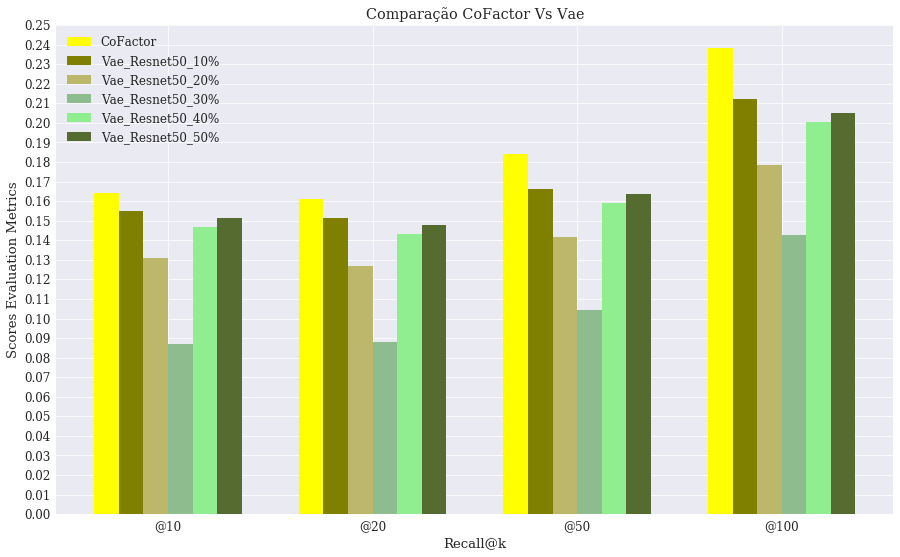

Recall Values:
             @10     @20     @50    @100
CoFactor  0.1640  0.1611  0.1842  0.2381
10%       0.1550  0.1515  0.1663  0.2121
20%       0.1308  0.1268  0.1417  0.1783
30%       0.0872  0.0879  0.1042  0.1426
40%       0.1470  0.1432  0.1589  0.2003
50%       0.1512  0.1478  0.1638  0.2050





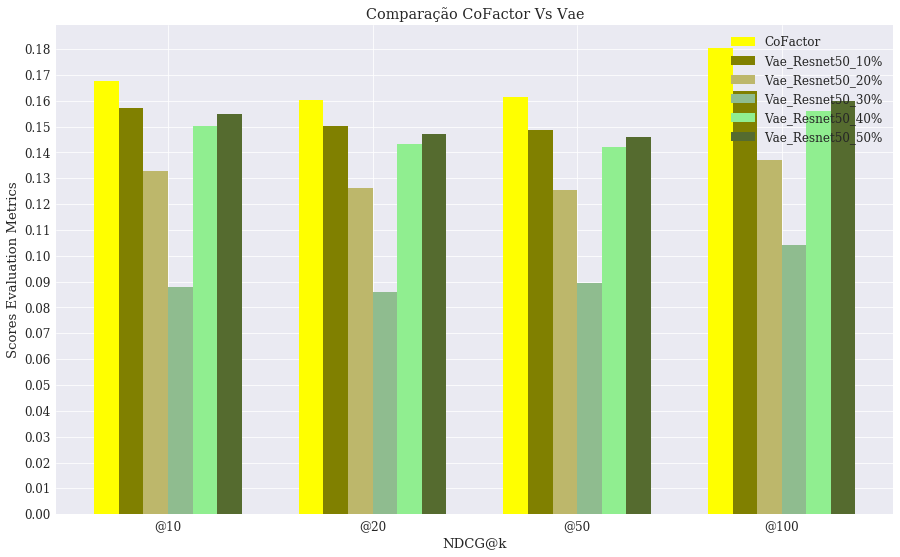

NDCG Values:
             @10     @20     @50    @100
CoFactor  0.1675  0.1601  0.1615  0.1803
10%       0.1570  0.1501  0.1486  0.1639
20%       0.1329  0.1264  0.1253  0.1371
30%       0.0878  0.0858  0.0896  0.1041
40%       0.1502  0.1431  0.1421  0.1561
50%       0.1547  0.1470  0.1460  0.1597





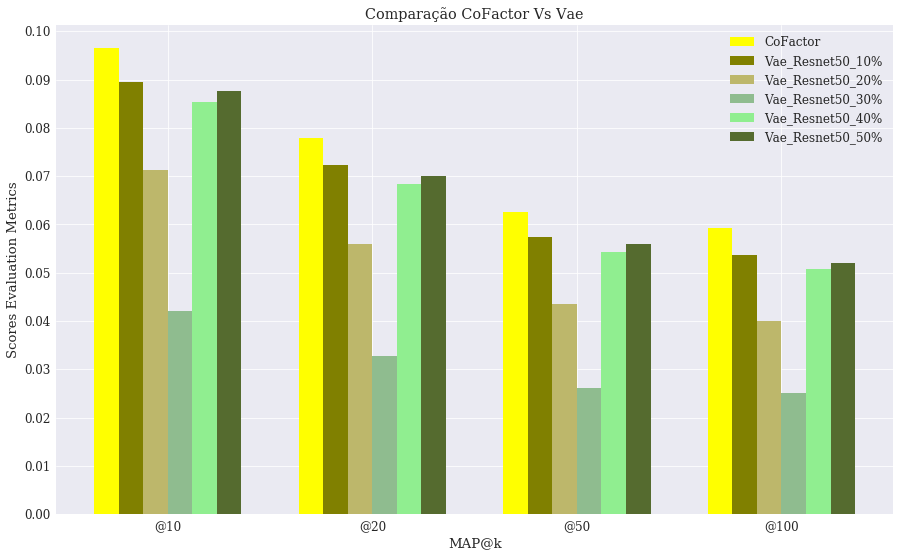

MAP Values:
             @10     @20     @50    @100
CoFactor  0.0965  0.0780  0.0625  0.0593
10%       0.0896  0.0724  0.0574  0.0537
20%       0.0712  0.0559  0.0435  0.0401
30%       0.0421  0.0327  0.0261  0.0251
40%       0.0853  0.0684  0.0542  0.0508
50%       0.0876  0.0701  0.0559  0.0520


In [9]:
list_file_name = ['vae_resnet50_10_pct_rec_val'
                  , 'vae_resnet50_20_pct_rec_val'
                  , 'vae_resnet50_30_pct_rec_val'
                  , 'vae_resnet50_40_pct_rec_val'
                  , 'vae_resnet50_50_pct_rec_val']

CoFactor_dic, file_dic = prepraraFiles(list_file_name, file_path)
geraGraficos(CoFactor_dic, file_dic, True)

-------------------------------------------------------------------------------------------------------------------

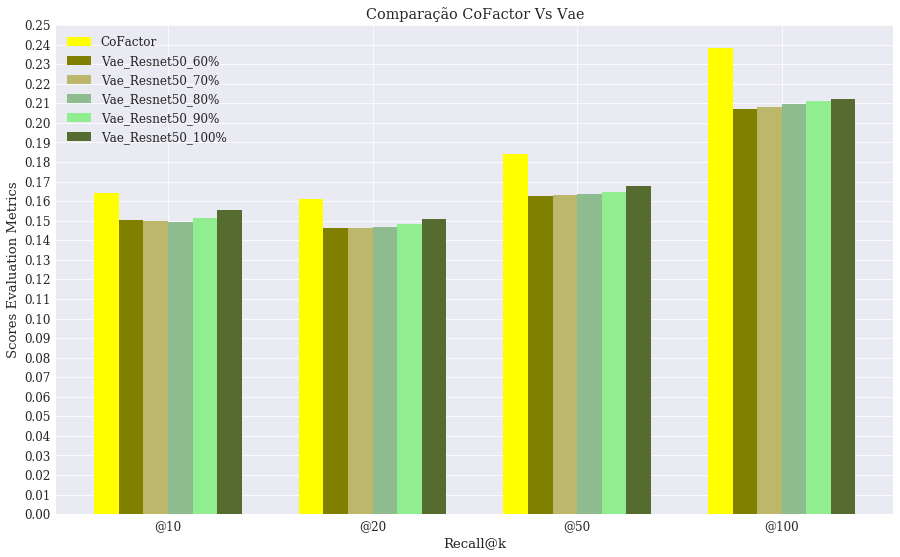

Recall Values:
             @10     @20     @50    @100
CoFactor  0.1640  0.1611  0.1842  0.2381
60%       0.1505  0.1463  0.1627  0.2072
70%       0.1497  0.1465  0.1633  0.2083
80%       0.1491  0.1468  0.1636  0.2095
90%       0.1515  0.1482  0.1647  0.2109
100%      0.1553  0.1509  0.1678  0.2124





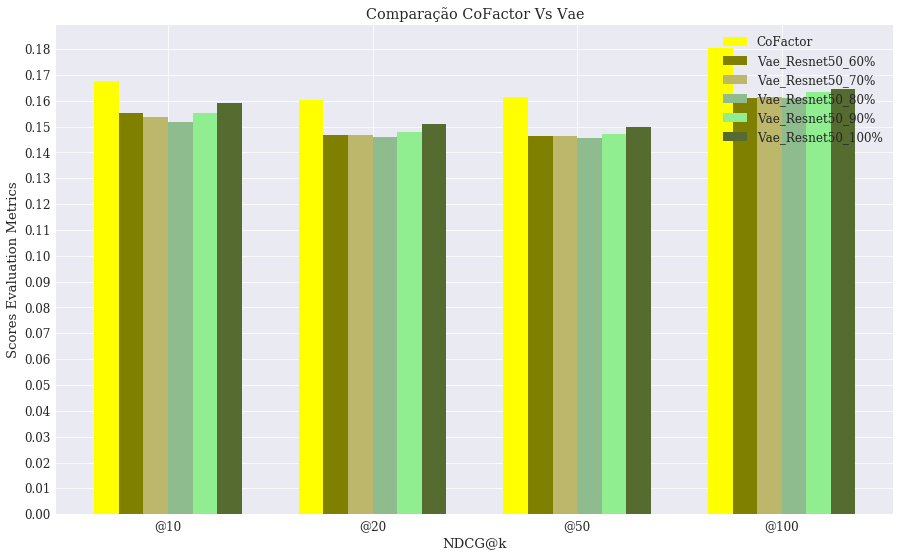

NDCG Values:
             @10     @20     @50    @100
CoFactor  0.1675  0.1601  0.1615  0.1803
60%       0.1552  0.1468  0.1462  0.1610
70%       0.1536  0.1468  0.1464  0.1613
80%       0.1519  0.1458  0.1457  0.1609
90%       0.1551  0.1480  0.1473  0.1632
100%      0.1591  0.1508  0.1499  0.1645





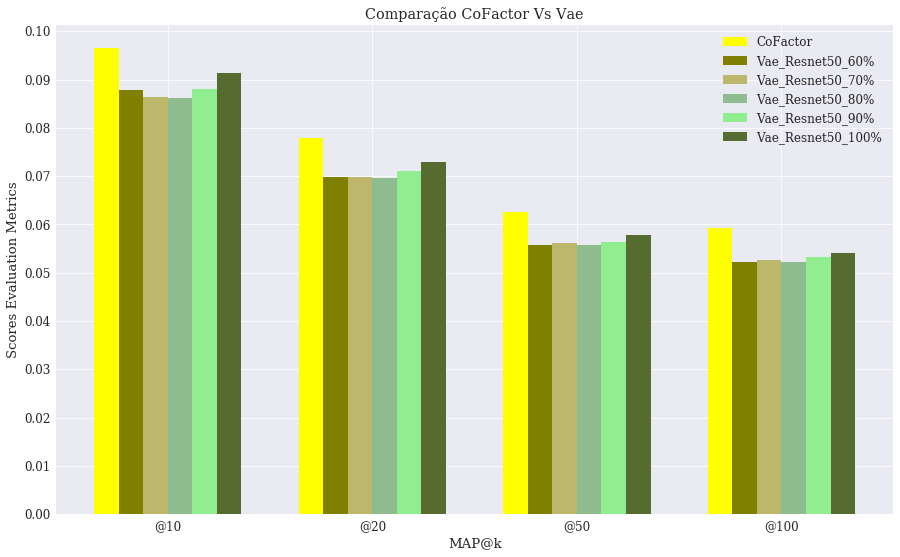

MAP Values:
             @10     @20     @50    @100
CoFactor  0.0965  0.0780  0.0625  0.0593
60%       0.0879  0.0699  0.0558  0.0523
70%       0.0865  0.0698  0.0561  0.0527
80%       0.0862  0.0697  0.0557  0.0523
90%       0.0880  0.0710  0.0564  0.0533
100%      0.0914  0.0729  0.0578  0.0540


In [10]:
list_file_name = ['vae_resnet50_60_pct_rec_val'
                  , 'vae_resnet50_70_pct_rec_val'
                  , 'vae_resnet50_80_pct_rec_val'
                  , 'vae_resnet50_90_pct_rec_val'
                  , 'vae_resnet50_100_pct_rec_val']
CoFactor_dic, file_dic = prepraraFiles(list_file_name, file_path)
geraGraficos(CoFactor_dic, file_dic, False)

-------------------------------------------------------------------------------------------------------------------

## Gráficos CoFactor Vs Rede Neural Vgg16

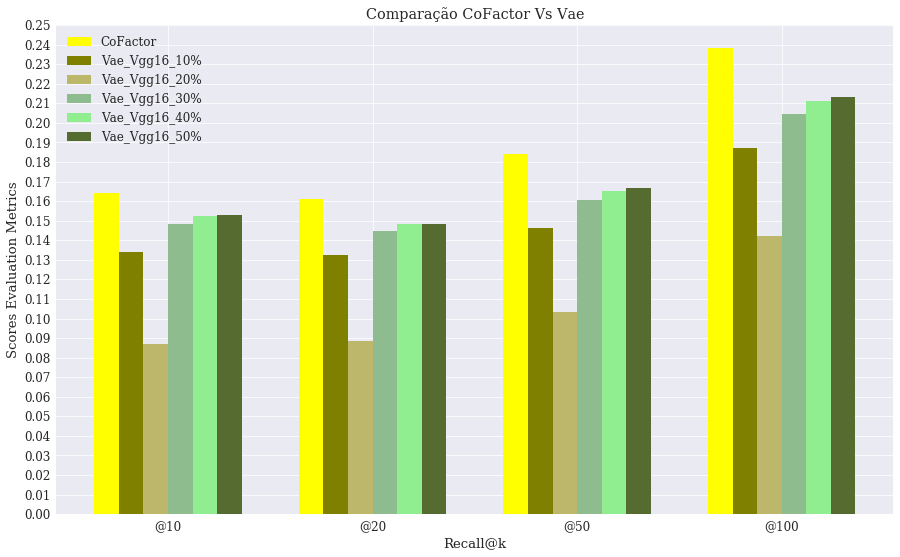

Recall Values:
             @10     @20     @50    @100
CoFactor  0.1640  0.1611  0.1842  0.2381
10%       0.1341  0.1327  0.1465  0.1870
20%       0.0871  0.0885  0.1033  0.1423
30%       0.1481  0.1445  0.1605  0.2047
40%       0.1526  0.1484  0.1654  0.2112
50%       0.1531  0.1484  0.1668  0.2131





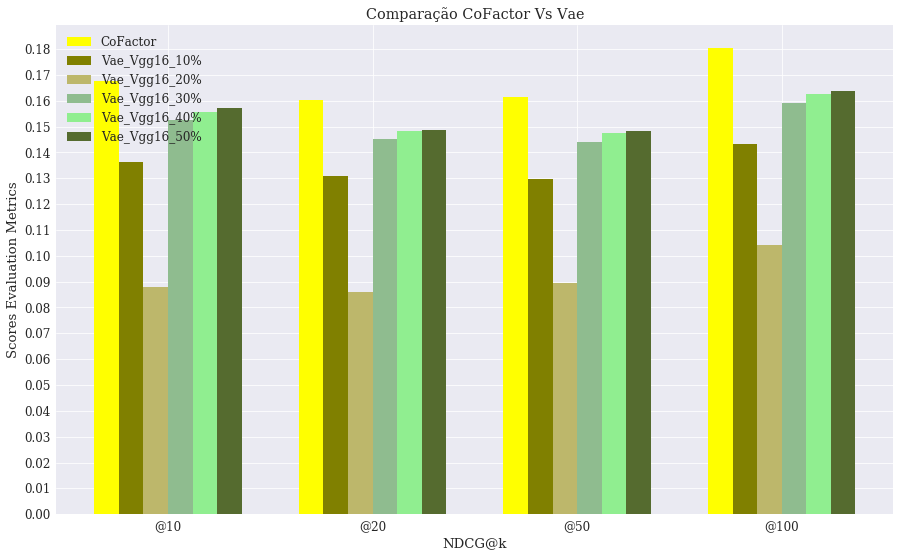

NDCG Values:
             @10     @20     @50    @100
CoFactor  0.1675  0.1601  0.1615  0.1803
10%       0.1363  0.1309  0.1296  0.1432
20%       0.0878  0.0861  0.0894  0.1040
30%       0.1527  0.1452  0.1442  0.1590
40%       0.1557  0.1481  0.1475  0.1627
50%       0.1570  0.1488  0.1482  0.1639





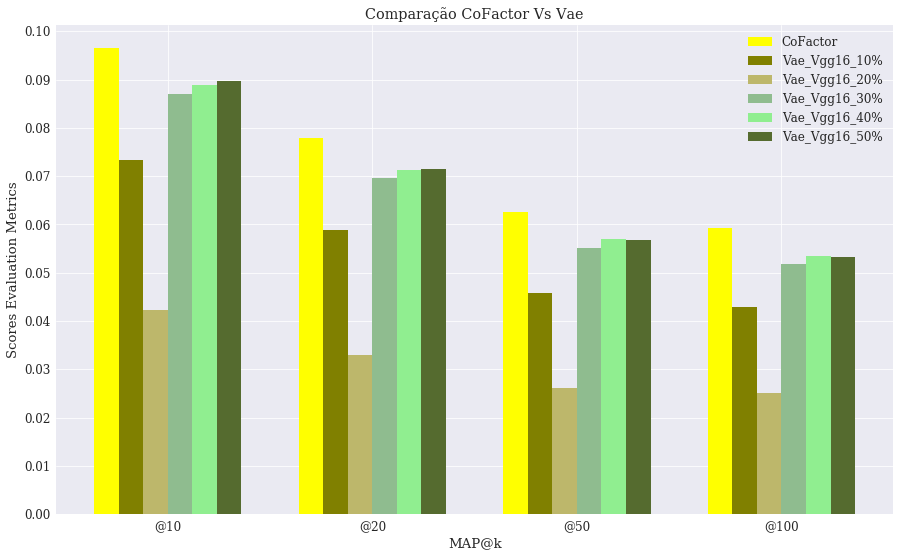

MAP Values:
             @10     @20     @50    @100
CoFactor  0.0965  0.0780  0.0625  0.0593
10%       0.0733  0.0588  0.0459  0.0429
20%       0.0422  0.0329  0.0261  0.0251
30%       0.0870  0.0696  0.0552  0.0518
40%       0.0888  0.0712  0.0569  0.0534
50%       0.0897  0.0715  0.0568  0.0533


In [11]:
list_file_name = ['vae_vgg16_10_pct_rec_val'
                  , 'vae_vgg16_20_pct_rec_val'
                  , 'vae_vgg16_30_pct_rec_val'
                  , 'vae_vgg16_40_pct_rec_val'
                  , 'vae_vgg16_50_pct_rec_val'
                  ]

CoFactor_dic, file_dic = prepraraFiles(list_file_name, file_path)
geraGraficos(CoFactor_dic, file_dic, True)

-------------------------------------------------------------------------------------------------------------------

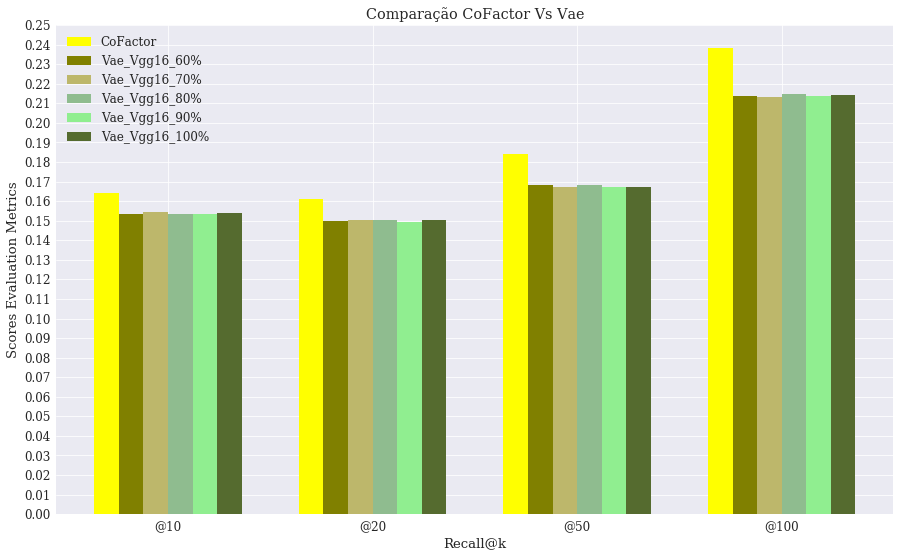

Recall Values:
             @10     @20     @50    @100
CoFactor  0.1640  0.1611  0.1842  0.2381
60%       0.1535  0.1497  0.1683  0.2136
70%       0.1545  0.1505  0.1673  0.2134
80%       0.1532  0.1503  0.1681  0.2148
90%       0.1536  0.1493  0.1670  0.2139
100%      0.1541  0.1502  0.1670  0.2144





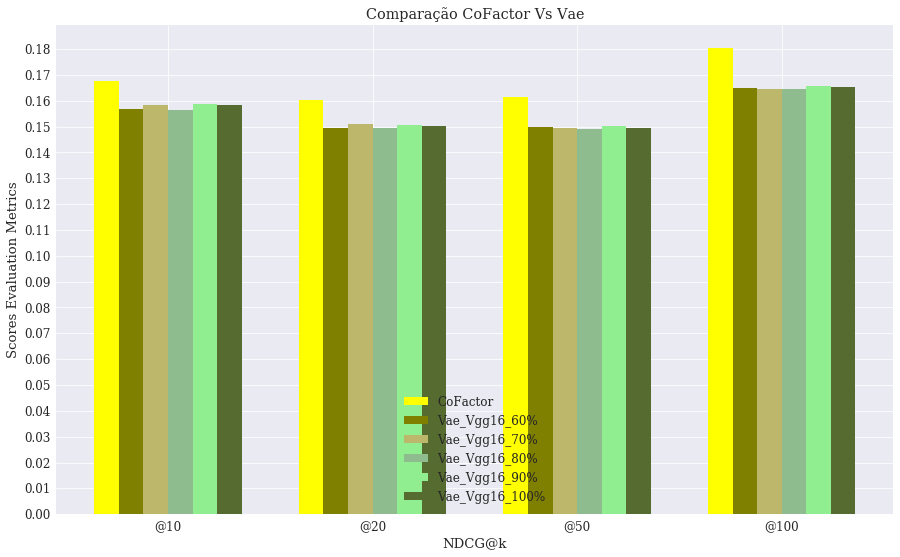

NDCG Values:
             @10     @20     @50    @100
CoFactor  0.1675  0.1601  0.1615  0.1803
60%       0.1568  0.1494  0.1497  0.1649
70%       0.1585  0.1508  0.1494  0.1647
80%       0.1565  0.1496  0.1490  0.1647
90%       0.1589  0.1505  0.1501  0.1656
100%      0.1583  0.1504  0.1495  0.1653





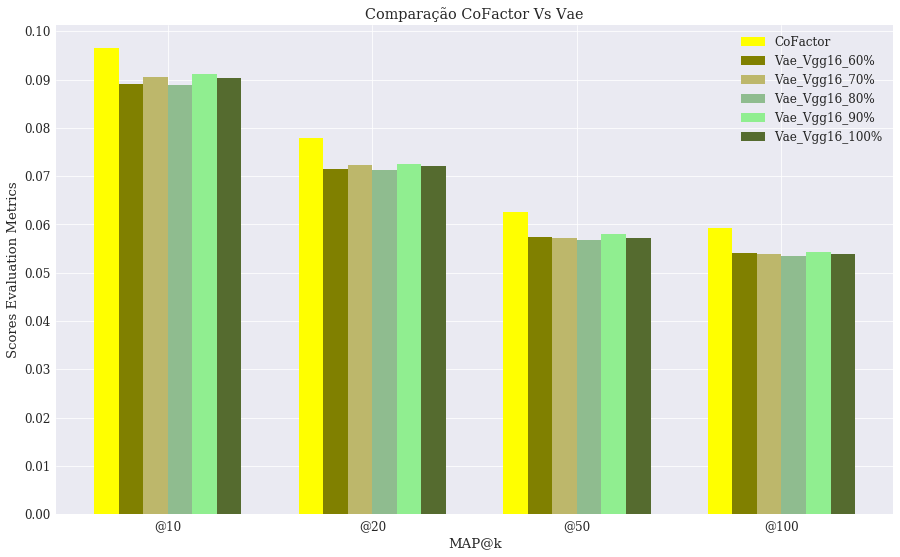

MAP Values:
             @10     @20     @50    @100
CoFactor  0.0965  0.0780  0.0625  0.0593
60%       0.0891  0.0715  0.0574  0.0540
70%       0.0906  0.0724  0.0572  0.0538
80%       0.0888  0.0713  0.0568  0.0534
90%       0.0912  0.0725  0.0580  0.0544
100%      0.0904  0.0722  0.0573  0.0538


In [12]:
list_file_name = ['vae_vgg16_60_pct_rec_val'
                  , 'vae_vgg16_70_pct_rec_val'
                  , 'vae_vgg16_80_pct_rec_val'
                  , 'vae_vgg16_90_pct_rec_val'
                  ,'vae_vgg16_100_pct_rec_val']
CoFactor_dic, file_dic = prepraraFiles(list_file_name, file_path)
geraGraficos(CoFactor_dic, file_dic, False)

-------------------------------------------------------------------------------------------------------------------

## Gráficos CoFactor Vs Rede Neural Vgg19

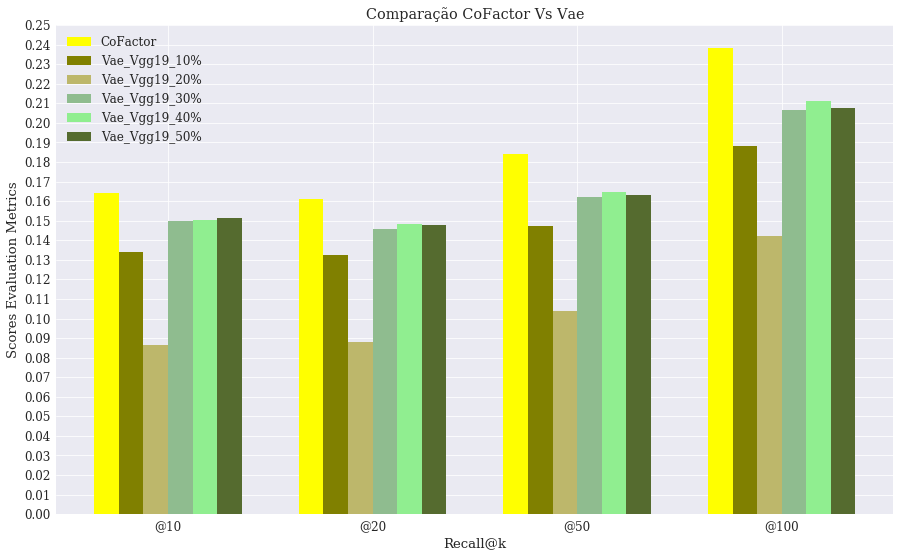

Recall Values:
             @10     @20     @50    @100
CoFactor  0.1640  0.1611  0.1842  0.2381
10%       0.1340  0.1323  0.1474  0.1880
20%       0.0867  0.0882  0.1037  0.1423
30%       0.1497  0.1459  0.1619  0.2063
40%       0.1501  0.1484  0.1644  0.2114
50%       0.1513  0.1476  0.1630  0.2077





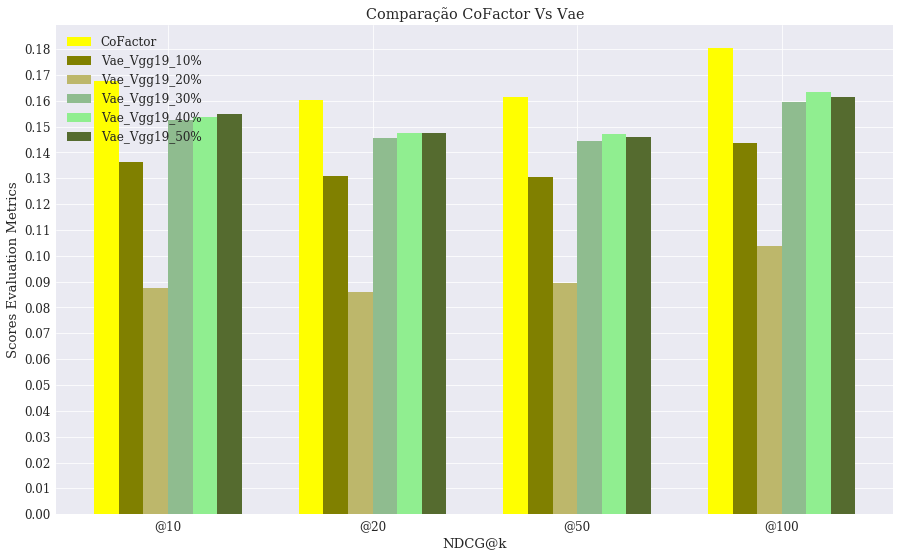

NDCG Values:
             @10     @20     @50    @100
CoFactor  0.1675  0.1601  0.1615  0.1803
10%       0.1362  0.1308  0.1303  0.1437
20%       0.0875  0.0861  0.0895  0.1039
30%       0.1527  0.1455  0.1445  0.1595
40%       0.1538  0.1477  0.1473  0.1633
50%       0.1550  0.1474  0.1461  0.1613





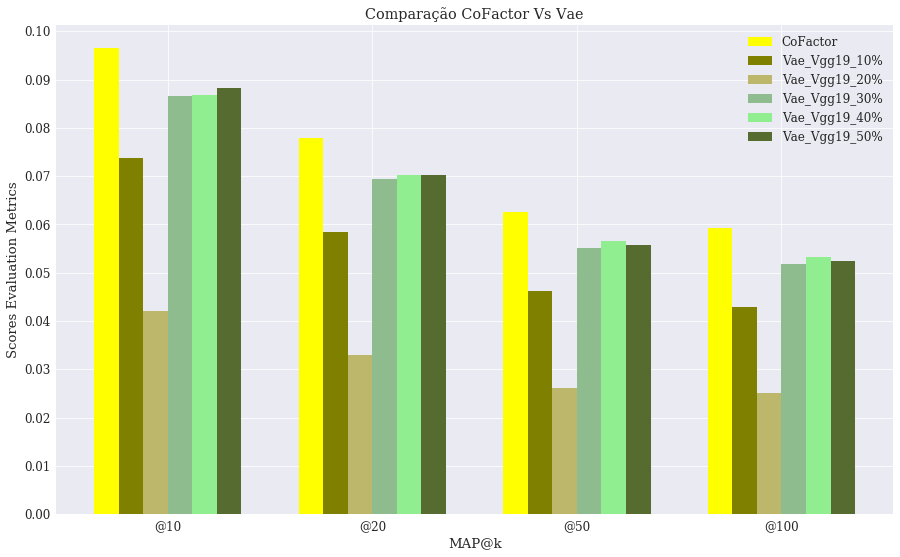

MAP Values:
             @10     @20     @50    @100
CoFactor  0.0965  0.0780  0.0625  0.0593
10%       0.0737  0.0585  0.0462  0.0430
20%       0.0421  0.0329  0.0261  0.0251
30%       0.0867  0.0695  0.0552  0.0519
40%       0.0869  0.0703  0.0565  0.0533
50%       0.0882  0.0703  0.0557  0.0524


In [13]:
list_file_name = ['vae_vgg19_10_pct_rec_val'
                  , 'vae_vgg19_20_pct_rec_val'
                  , 'vae_vgg19_30_pct_rec_val'
                  , 'vae_vgg19_40_pct_rec_val'
                  , 'vae_vgg19_50_pct_rec_val'
                  ]

CoFactor_dic, file_dic = prepraraFiles(list_file_name, file_path)
geraGraficos(CoFactor_dic, file_dic, True)

-------------------------------------------------------------------------------------------------------------------

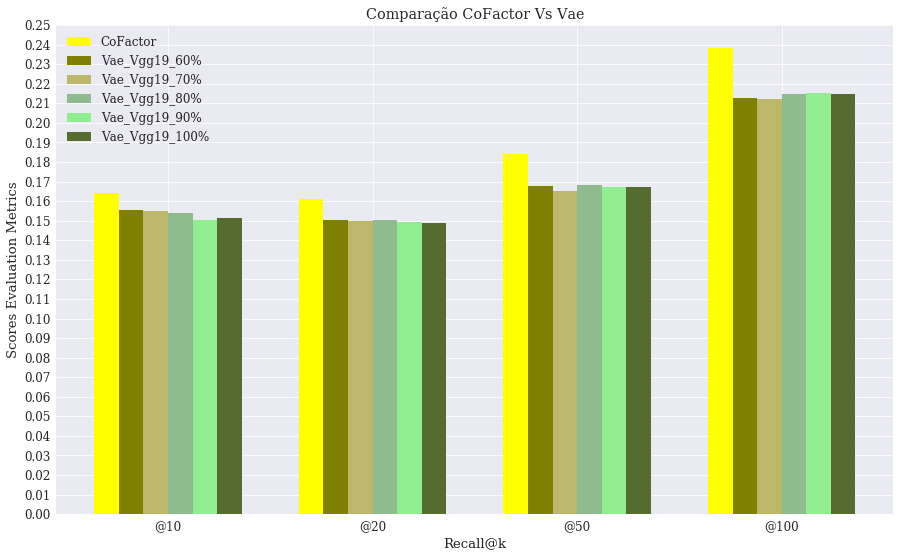

Recall Values:
             @10     @20     @50    @100
CoFactor  0.1640  0.1611  0.1842  0.2381
60%       0.1556  0.1502  0.1677  0.2126
70%       0.1551  0.1499  0.1652  0.2122
80%       0.1540  0.1502  0.1684  0.2147
90%       0.1502  0.1494  0.1674  0.2153
100%      0.1516  0.1487  0.1674  0.2147





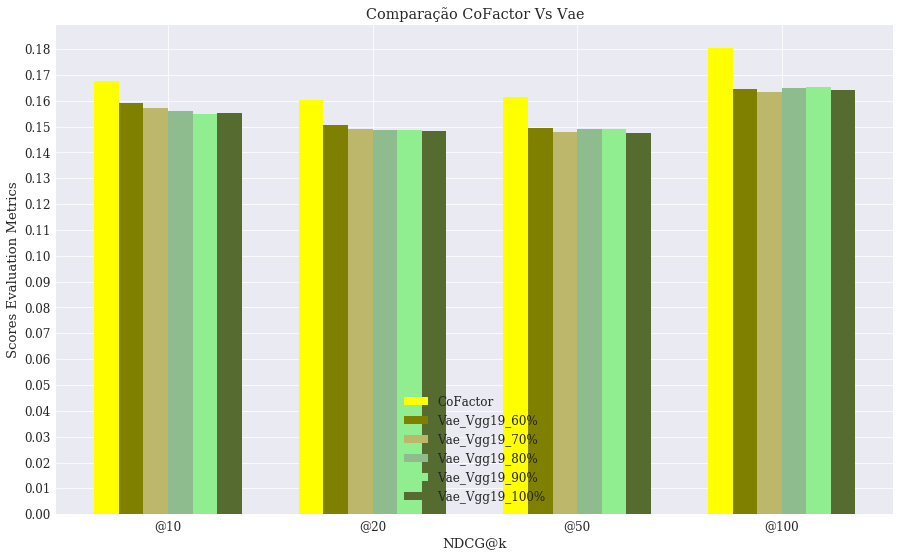

NDCG Values:
             @10     @20     @50    @100
CoFactor  0.1675  0.1601  0.1615  0.1803
60%       0.1593  0.1505  0.1495  0.1644
70%       0.1570  0.1492  0.1479  0.1632
80%       0.1561  0.1488  0.1492  0.1650
90%       0.1548  0.1487  0.1491  0.1652
100%      0.1553  0.1482  0.1477  0.1641





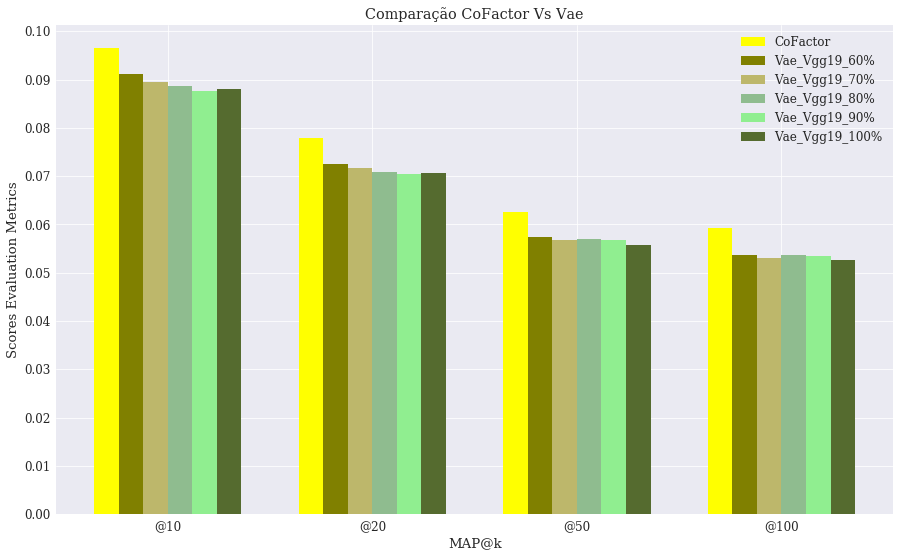

MAP Values:
             @10     @20     @50    @100
CoFactor  0.0965  0.0780  0.0625  0.0593
60%       0.0911  0.0725  0.0574  0.0536
70%       0.0895  0.0718  0.0568  0.0531
80%       0.0886  0.0709  0.0569  0.0536
90%       0.0877  0.0705  0.0567  0.0534
100%      0.0881  0.0707  0.0558  0.0527


In [14]:
list_file_name = ['vae_vgg19_60_pct_rec_val'
                  , 'vae_vgg19_70_pct_rec_val'
                  , 'vae_vgg19_80_pct_rec_val'
                  , 'vae_vgg19_90_pct_rec_val'
                  , 'vae_vgg19_100_pct_rec_val'
                  ]

CoFactor_dic, file_dic = prepraraFiles(list_file_name, file_path)
geraGraficos(CoFactor_dic, file_dic, False)

-------------------------------------------------------------------------------------------------------------------

## Gráficos CoFactor Vs Rede Neural Xception

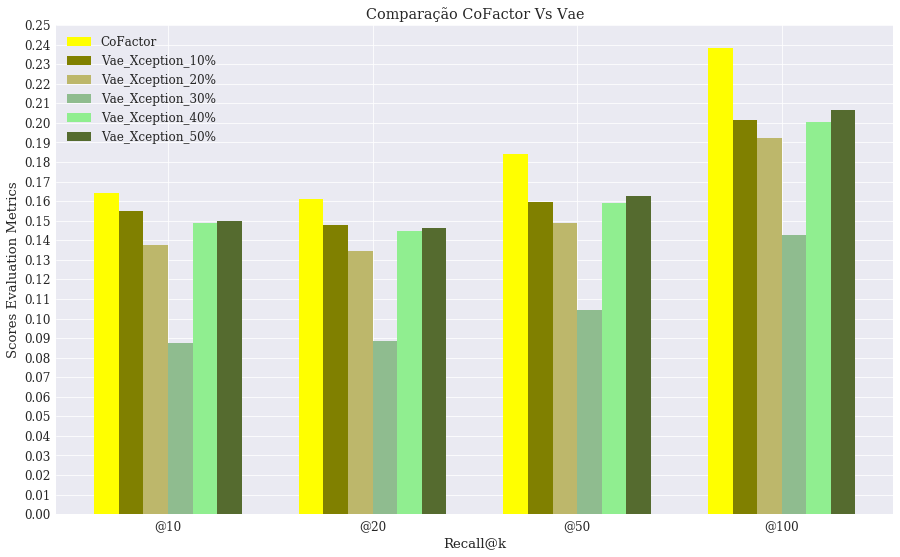

Recall Values:
             @10     @20     @50    @100
CoFactor  0.1640  0.1611  0.1842  0.2381
10%       0.1548  0.1478  0.1594  0.2012
20%       0.1375  0.1347  0.1489  0.1922
30%       0.0873  0.0887  0.1041  0.1428
40%       0.1486  0.1445  0.1590  0.2006
50%       0.1499  0.1461  0.1625  0.2067





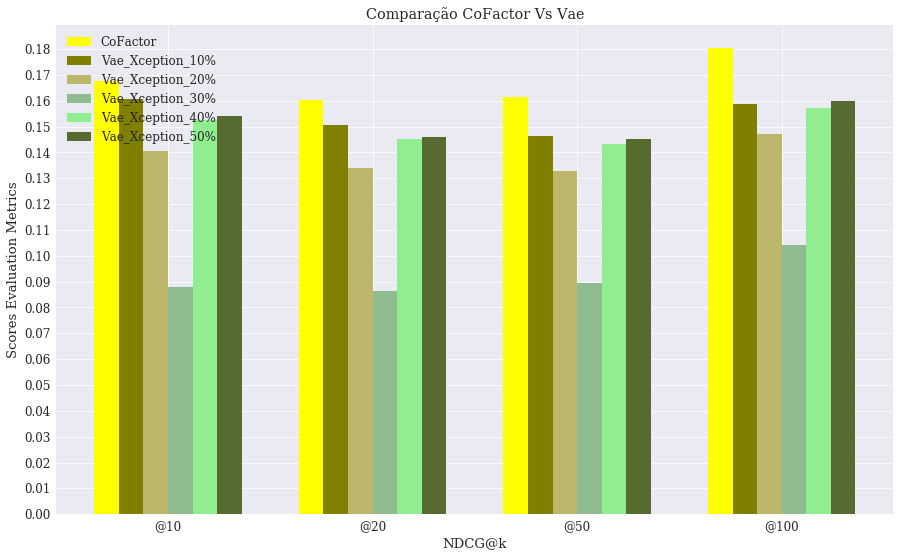

NDCG Values:
             @10     @20     @50    @100
CoFactor  0.1675  0.1601  0.1615  0.1803
10%       0.1608  0.1506  0.1462  0.1589
20%       0.1406  0.1338  0.1327  0.1472
30%       0.0879  0.0863  0.0896  0.1042
40%       0.1526  0.1450  0.1434  0.1571
50%       0.1540  0.1461  0.1451  0.1600





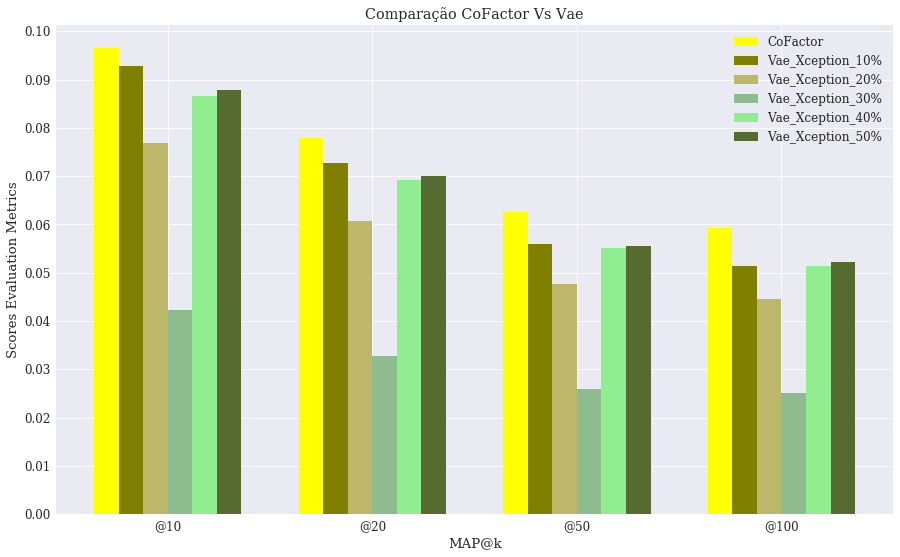

MAP Values:
             @10     @20     @50    @100
CoFactor  0.0965  0.0780  0.0625  0.0593
10%       0.0929  0.0728  0.0560  0.0515
20%       0.0769  0.0608  0.0477  0.0446
30%       0.0422  0.0328  0.0260  0.0250
40%       0.0867  0.0692  0.0552  0.0515
50%       0.0879  0.0700  0.0555  0.0522


In [15]:
list_file_name = ['vae_xception_10_pct_rec_val'
                  , 'vae_xception_20_pct_rec_val'
                  , 'vae_xception_30_pct_rec_val'
                  , 'vae_xception_40_pct_rec_val'
                  , 'vae_xception_50_pct_rec_val'
                  ]

CoFactor_dic, file_dic = prepraraFiles(list_file_name, file_path)
geraGraficos(CoFactor_dic, file_dic, True)

-------------------------------------------------------------------------------------------------------------------

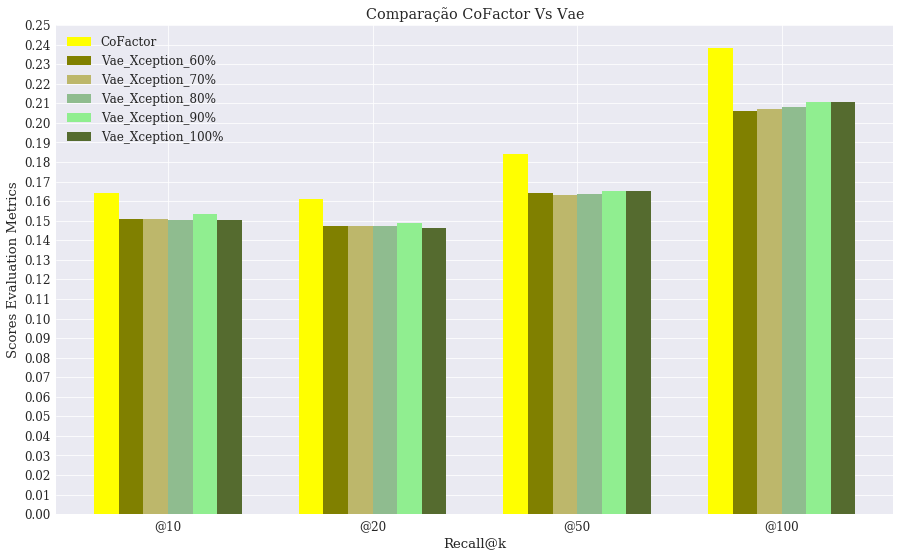

Recall Values:
             @10     @20     @50    @100
CoFactor  0.1640  0.1611  0.1842  0.2381
60%       0.1507  0.1475  0.1643  0.2061
70%       0.1509  0.1473  0.1633  0.2073
80%       0.1502  0.1472  0.1637  0.2082
90%       0.1533  0.1488  0.1650  0.2106
100%      0.1502  0.1461  0.1650  0.2107





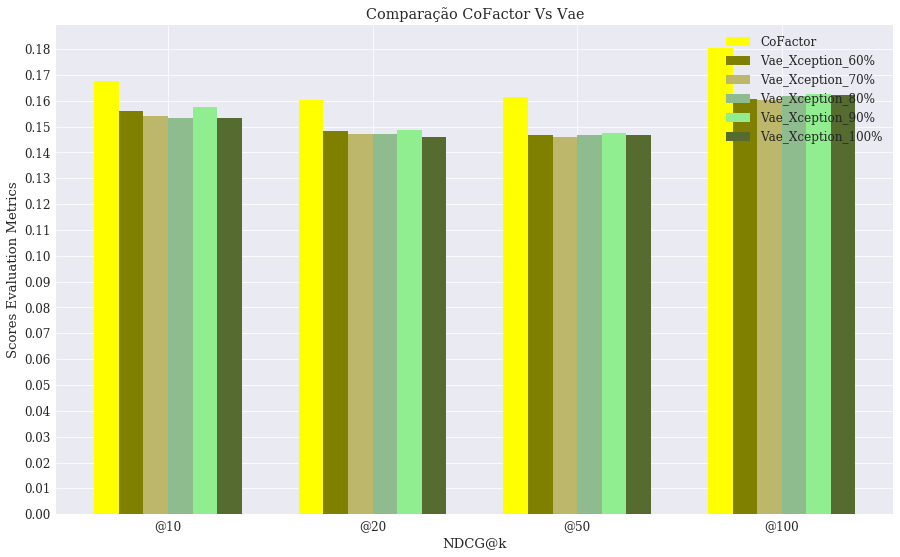

NDCG Values:
             @10     @20     @50    @100
CoFactor  0.1675  0.1601  0.1615  0.1803
60%       0.1559  0.1481  0.1467  0.1607
70%       0.1541  0.1470  0.1458  0.1603
80%       0.1535  0.1470  0.1467  0.1618
90%       0.1575  0.1488  0.1477  0.1625
100%      0.1535  0.1461  0.1466  0.1623





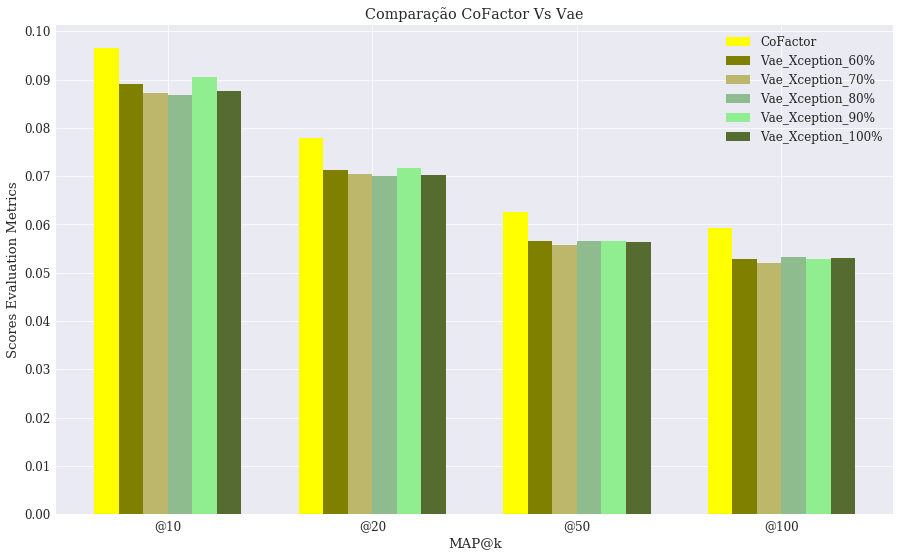

MAP Values:
             @10     @20     @50    @100
CoFactor  0.0965  0.0780  0.0625  0.0593
60%       0.0891  0.0713  0.0565  0.0528
70%       0.0873  0.0704  0.0558  0.0521
80%       0.0868  0.0700  0.0565  0.0532
90%       0.0905  0.0716  0.0565  0.0529
100%      0.0876  0.0702  0.0563  0.0530


In [16]:
list_file_name = ['vae_xception_60_pct_rec_val'
                  , 'vae_xception_70_pct_rec_val'
                  , 'vae_xception_80_pct_rec_val'
                  , 'vae_xception_90_pct_rec_val'
                  , 'vae_xception_100_pct_rec_val'
                  ]

CoFactor_dic, file_dic = prepraraFiles(list_file_name, file_path)
geraGraficos(CoFactor_dic, file_dic, False)
